In [9]:
import numpy as np
import pandas as pd
import xlrd


In [10]:
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

In [12]:
filepath= ('file:///C:/Users/NEW%20USER/Downloads/LOG%20REG%20FOR%20CATFISH%20(Autosaved).xlsx')

In [13]:
filepath= 'file:///C:/Users/NEW%20USER/Downloads/LOG%20REG%20FOR%20CATFISH%20(Autosaved).xlsx'
df= pd.read_excel(filepath, sheet_name= 'Sheet3', skiprows= 1)

In [14]:
df.columns

Index(['feed', 'Fish_meal', 'rockyprawn', 'Feather Meal', 'brewers_waste',
       'soybean_mel', 'blood_meal', 'Lipid', 'maggot_meal', 'wheatbran',
       'yellow_maize', 'groundnut_cake', 'CMC', 'Vitamin', 'Chromic',
       'Minerals', 'Calcium', 'Cellulose', 'Tapioca', 'protein', 'fat', 'ash',
       'crude_fibre', 'NFE', 'moisture', 'culture_period', 'fish_weight', 'WG',
       'PER', 'FCR', 'SGR', 'FCR_churn'],
      dtype='object')

In [17]:
df= df[['Fish_meal', 'rockyprawn', 'Feather Meal', 'brewers_waste',
       'soybean_mel', 'blood_meal', 'Lipid', 'maggot_meal', 'wheatbran',
       'yellow_maize', 'groundnut_cake', 'CMC', 'Vitamin', 'Chromic',
       'Minerals', 'Calcium', 'Cellulose', 'Tapioca', 'protein', 'fat', 'ash',
       'crude_fibre', 'NFE', 'moisture', 'culture_period', 'fish_weight', 'FCR_churn']]

In [18]:
df.columns.value_counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Fish_meal       24 non-null     float64
 1   rockyprawn      24 non-null     int64  
 2   Feather Meal    24 non-null     float64
 3   brewers_waste   24 non-null     float64
 4   soybean_mel     24 non-null     float64
 5   blood_meal      24 non-null     float64
 6   Lipid           24 non-null     float64
 7   maggot_meal     24 non-null     float64
 8   wheatbran       24 non-null     float64
 9   yellow_maize    24 non-null     float64
 10  groundnut_cake  24 non-null     float64
 11  CMC             24 non-null     float64
 12  Vitamin         24 non-null     float64
 13  Chromic         24 non-null     float64
 14  Minerals        24 non-null     float64
 15  Calcium         24 non-null     float64
 16  Cellulose       24 non-null     float64
 17  Tapioca         24 non-null     float

In [19]:
df.index

RangeIndex(start=0, stop=24, step=1)

In [20]:
X = np.asarray(df[['Fish_meal', 'rockyprawn', 'Feather Meal', 'brewers_waste',
       'soybean_mel', 'blood_meal', 'Lipid', 'maggot_meal', 'wheatbran',
       'yellow_maize', 'groundnut_cake', 'CMC', 'Vitamin', 'Chromic',
       'Minerals', 'Calcium', 'Cellulose', 'Tapioca', 'protein', 'fat', 'ash',
       'crude_fibre', 'NFE', 'moisture', 'culture_period', 'fish_weight']])
X[0:5]

array([[56.5  ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  6.43 ,  0.   ,
         0.   ,  0.   ,  0.   ,  2.36 ,  3.   ,  0.5  ,  4.   ,  1.   ,
         5.34 , 28.25 , 39.82 , 11.45 , 86.55 ,  4.811, 25.85 ,  4.78 ,
         4.   ,  2.85 ],
       [45.32 ,  0.   ,  9.86 ,  0.   ,  0.   ,  0.   ,  7.54 ,  0.   ,
         0.   ,  0.   ,  0.   ,  2.36 ,  3.   ,  0.5  ,  4.   ,  1.   ,
         6.1  , 28.39 , 39.51 , 11.23 , 87.43 ,  4.811, 25.85 ,  5.12 ,
         4.   ,  2.85 ],
       [33.99 ,  0.   , 19.71 ,  0.   ,  0.   ,  0.   ,  8.63 ,  0.   ,
         0.   ,  0.   ,  0.   ,  2.36 ,  3.   ,  0.5  ,  4.   ,  1.   ,
         6.88 , 28.53 , 41.25 , 11.87 , 89.1  ,  4.811, 25.85 ,  5.03 ,
         4.   ,  2.85 ],
       [22.66 ,  0.   , 29.57 ,  0.   ,  0.   ,  0.   ,  9.73 ,  0.   ,
         0.   ,  0.   ,  0.   ,  2.36 ,  3.   ,  0.5  ,  4.   ,  1.   ,
         7.66 , 28.67 , 38.95 , 12.14 , 89.7  ,  4.811, 25.85 ,  5.89 ,
         4.   ,  2.85 ],
       [11.33 ,  0.   , 39.42 ,  0. 

In [21]:
y= np.asarray(df['FCR_churn'])

In [22]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X= pd.DataFrame(X)


In [23]:
from sklearn.model_selection import train_test_split

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=2)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (19, 26) (19,)
Test set: (5, 26) (5,)


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C= 0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [90]:
import xlrd

In [91]:
yhat = LR.predict(X_test)
yhat[0::]



array([0, 0, 0, 0, 1], dtype=int64)

In [92]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob= pd.DataFrame(yhat_prob)
yhat_prob.to_excel('log_catfish.xlsx', sheet_name= 'liblinar probability')

In [93]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.8

In [94]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True FCR')
    plt.xlabel('Predicted FCR')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[1 1]
 [0 3]]


Confusion matrix, without normalization
[[1 1]
 [0 3]]


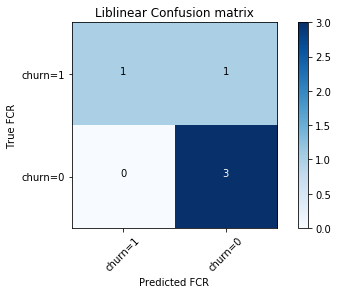

In [95]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Liblinear Confusion matrix')

In [96]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.50      0.67         2

    accuracy                           0.80         5
   macro avg       0.88      0.75      0.76         5
weighted avg       0.85      0.80      0.78         5



In [97]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.6773433078904977

In [98]:
# write your code here
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='newton-cg').fit(X_train,y_train)
LR


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [99]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob



array([[0.59, 0.41],
       [0.64, 0.36],
       [0.6 , 0.4 ],
       [0.6 , 0.4 ],
       [0.51, 0.49]])

In [100]:
jaccard_similarity_score(y_test, yhat)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.8

Confusion matrix, without normalization
[[1 1]
 [0 3]]


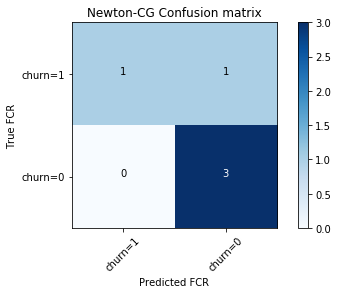

In [101]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Newton-CG Confusion matrix')

In [102]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.50      0.67         2

    accuracy                           0.80         5
   macro avg       0.88      0.75      0.76         5
weighted avg       0.85      0.80      0.78         5



In [103]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.6587305564466072

In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01
                        , solver='sag').fit(X_train,y_train)
LR
yhat = LR.predict(X_test)
yhat

array([0, 0, 0, 0, 0], dtype=int64)

In [105]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.59, 0.41],
       [0.64, 0.36],
       [0.6 , 0.4 ],
       [0.61, 0.39],
       [0.51, 0.49]])

In [106]:
jaccard_similarity_score(y_test, yhat)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.6

Confusion matrix, without normalization
[[0 2]
 [0 3]]


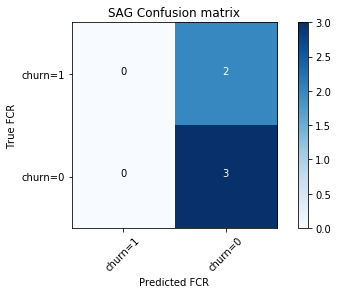

In [107]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='SAG Confusion matrix')

In [108]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.60      1.00      0.75         3
           1       0.00      0.00      0.00         2

    accuracy                           0.60         5
   macro avg       0.30      0.50      0.37         5
weighted avg       0.36      0.60      0.45         5



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [109]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.6587065848937785

In [39]:
df['Fish_meal']

0     56.50
1     45.32
2     33.99
3     22.66
4     11.33
5      0.00
6     31.73
7     22.77
8     31.89
9     17.76
10    14.55
11    25.00
12    12.50
13     0.00
14    13.63
15    13.30
16    13.30
17    13.00
18    13.00
19    62.00
20    47.00
21    31.00
22    15.00
23     0.00
Name: Fish_meal, dtype: float64

AttributeError: 'DataFrame' object has no attribute 'value_column'

In [40]:
df= df[['percentage_inclusion',
       'culture_period', 'fish_weight', 'moisture', 'crude_fibre', 'NFE',
       'protein', 'Fat', 'ash_content', 'WG', 'FCR', 'SGR', 'PER']]

In [42]:

X = df[['percentage_inclusion','culture_period', 'fish_weight', 'moisture', 'crude_fibre', 'NFE','protein', 'Fat','ash_content']]
X= np.asanarray
Y = df[['FCR']]

validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
test_size=validation_size, random_state=seed)

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [45]:

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chang

LR: nan (nan)
LDA: nan (nan)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unknown label type: (array([2.16, 4.16, 0.7 , 1.17, 1.24, 2.3 , 0.68, 2.62, 3.13, 0.62, 3.57,
       0.65, 3.96, 2.33, 3.08, 2.85, 0.68]),)

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.p

KNN: nan (nan)
CART: nan (nan)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

NB: nan (nan)
SVM: nan (nan)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters 

In [52]:
from pandas import set_option

In [53]:
set_option('precision', 3)
set_option('display.width', 100)
correlations= df.corr(method= 'pearson')

In [54]:
correlations
set_option('precision', 2)

In [55]:
skew= df.skew()

In [56]:
skew

Fish_meal         0.83
rockyprawn        2.63
Feather Meal      2.27
brewers_waste     1.53
soybean_mel       0.98
blood_meal        0.77
Lipid             1.15
maggot_meal       1.91
wheatbran         0.90
yellow_maize     -0.10
groundnut_cake    0.59
CMC               1.23
Vitamin           1.19
Chromic           0.96
Minerals          0.93
Calcium           0.24
Cellulose         1.39
Tapioca           1.23
protein           0.32
fat               0.46
ash               1.21
crude_fibre       0.23
NFE               1.75
moisture         -0.97
culture_period   -0.84
fish_weight       0.84
WG                2.07
PER               0.38
FCR               0.55
SGR               2.53
FCR_churn         0.36
dtype: float64

In [57]:
from matplotlib import pyplot

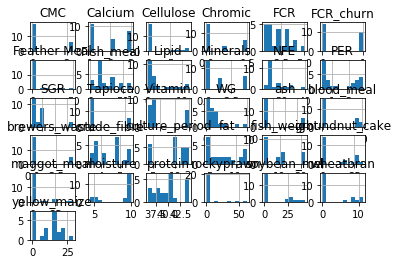

In [58]:
df.hist()
pyplot.show()

In [59]:
.

SyntaxError: invalid syntax (<ipython-input-59-a5d5b61aa8a6>, line 1)

In [60]:
df.plot(kind= 'box', subplots= True, layout= (3,3), sharex= False)
pyplot.show()

ValueError: Layout of 3x3 must be larger than required size 31

<Figure size 432x288 with 0 Axes>

In [61]:
corelation= df.corr()
corelation

,Fish_meal,rockyprawn,Feather Meal,brewers_waste,soybean_mel,blood_meal,Lipid,maggot_meal,wheatbran,yellow_maize,...,crude_fibre,NFE,moisture,culture_period,fish_weight,WG,PER,FCR,SGR,FCR_churn
Fish_meal,1.00,-0.18,-0.21,0.25,-4.31e-01,0.03,6.56e-02,-2.22e-01,-0.06,-0.07,...,-0.36,3.35e-01,-0.19,-0.13,0.05,4.02e-01,0.29,0.16,5.74e-01,-1.15e-01
rockyprawn,-0.18,1.00,-0.18,0.78,-2.75e-01,0.53,-1.09e-01,-2.08e-01,-0.28,0.16,...,-0.44,5.11e-01,0.22,0.41,0.06,-3.08e-01,0.48,0.08,-6.31e-02,-3.39e-01
Feather Meal,-0.21,-0.18,1.00,-0.23,-3.11e-01,-0.32,8.77e-01,-2.36e-01,-0.31,-0.61,...,0.23,-2.02e-01,-0.68,-0.74,-0.43,-2.41e-01,-0.19,0.12,-8.77e-02,-3.22e-01
brewers_waste,0.25,0.78,-0.23,1.00,-3.52e-01,0.68,-1.39e-01,-2.67e-01,-0.35,0.20,...,-0.60,8.61e-01,0.26,0.52,0.08,-3.93e-01,0.66,0.08,-2.81e-02,-4.34e-01
soybean_mel,-0.43,-0.27,-0.31,-0.35,1.00e+00,0.24,-2.88e-01,-8.36e-03,0.11,0.11,...,0.57,-2.60e-01,0.45,0.31,-0.27,-7.49e-02,0.04,-0.70,-1.20e-01,8.11e-01
blood_meal,0.03,0.53,-0.32,0.68,2.44e-01,1.00,-1.32e-01,-8.48e-02,0.04,0.15,...,-0.38,5.81e-01,0.38,0.47,0.08,-2.81e-01,0.88,-0.16,4.48e-02,-2.04e-02
Lipid,0.07,-0.11,0.88,-0.14,-2.88e-01,-0.13,1.00e+00,-4.10e-01,-0.40,-0.78,...,0.22,-1.18e-01,-0.78,-0.83,-0.60,1.68e-03,0.12,-0.04,3.11e-01,-1.44e-01
maggot_meal,-0.22,-0.21,-0.24,-0.27,-8.36e-03,-0.08,-4.10e-01,1.00e+00,0.64,0.29,...,-0.18,-1.88e-01,0.02,0.07,0.70,2.80e-01,-0.18,0.38,-1.61e-01,-1.85e-01
wheatbran,-0.06,-0.28,-0.31,-0.35,1.08e-01,0.04,-3.99e-01,6.39e-01,1.00,0.42,...,-0.34,-3.67e-01,0.27,0.09,0.81,2.28e-01,-0.14,0.50,-1.95e-01,-1.12e-01
yellow_maize,-0.07,0.16,-0.61,0.20,1.11e-01,0.15,-7.77e-01,2.90e-01,0.42,1.00,...,-0.50,2.82e-01,0.69,0.71,0.62,-1.88e-01,-0.13,0.22,-4.33e-01,-1.00e-01


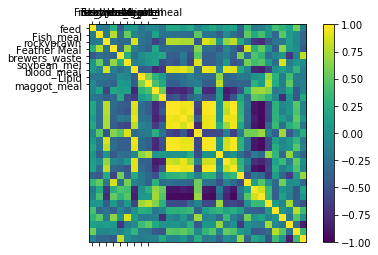

In [77]:
fig= pyplot.figure()
ax= fig.add_subplot(111)
cax= ax.matshow(corelation, vmin=-1, vmax= 1)
fig. colorbar(cax)
ticks= np.arange(0, 9, 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
pyplot.show()

ImportError: cannot import name 'scatter_matrix' from 'matplotlib' (C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py)

In [78]:
scatter_matrix(df)
pyplot.show()

NameError: name 'scatter_matrix' is not defined